<a href="https://colab.research.google.com/github/o-ouma/fraud-ml/blob/main/Fraud_Detection_with_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install tensorflow with pip
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 513.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

In [ ]:
pip install pandas networkx matplotlib

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install torch_geometric

In [ ]:
# import libraries/packages/dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import tensorflow as tf
import torch
import torch.nn as nn
import plotly.express as px
import random
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm

In [ ]:
# connect to google drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
fraud_df = pd.read_csv('/content/drive/MyDrive/data/datasets/fraud_dataset.zip',compression='zip')


In [ ]:
# preview first 20 entries in dataframe
fraud_df.head(20)


step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   
12     1   PAYMENT    2560.74  C1648232591        5070.00         2509.26   
13     1   PAYMENT   11633.76  C1716932897       10127.00            0.00   
14     1   PAYMENT    4098.78  C1026483832      503264.00       499165.22   
15     1  CASH_OUT  229133.94   C905080434       15325.00            0.00   
16     1   PAYMENT    1563.82   C761750706         450.00            0.00   
17     1   PAYMENT    1157.86  C1237762639       21156.00        19998.14   
18     1   PAYMENT     671.64  C2033524545       15123.00        14451.36   
19     1  TRANSFER  215310.30  C1670993182         705.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   M1979787155             0.0            0.00        0               0  
1   M2044282225             0.0            0.00        0               0  
2    C553264065             0.0            0.00        1               0  
3     C38997010         21182.0            0.00        1               0  
4   M1230701703             0.0            0.00        0               0  
5    M573487274             0.0            0.00        0               0  
6    M408069119             0.0            0.00        0               0  
7    M633326333             0.0            0.00        0               0  
8   M1176932104             0.0            0.00        0               0  
9    C195600860         41898.0        40348.79        0               0  
10   C997608398         10845.0       157982.12        0               0  
11  M2096539129             0.0            0.00        0               0  
12   M972865270             0.0            0.00        0               0  
13   M801569151             0.0            0.00        0               0  
14  M1635378213             0.0            0.00        0               0  
15   C476402209          5083.0        51513.44        0               0  
16  M1731217984             0.0            0.00        0               0  
17  M1877062907             0.0            0.00        0               0  
18   M473053293             0.0            0.00        0               0  
19  C1100439041         22425.0            0.00        0               0

## Exploratory Data Analysis

In [ ]:
# Get counts of fraudulent and non-fraudulent transactions
fraud_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
# Get counts of fraudulent transactions
fraud_df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
# Get entries of flagged fraudulent transactions
fraud_df[fraud_df['isFlaggedFraud'] == 1]

step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C2140038573    17316255.05   
6362462   730  TRANSFER   7316255.05  C1869569059    17316255.05   
6362584   741  TRANSFER   5674547.89   C992223106     5674547.89   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2736446      4953893.08   C639921569             0.0             0.0        1   
3247297      1343002.08  C1147517658             0.0             0.0        1   
3760288       536624.41  C1100697970             0.0             0.0        1   
5563713      4892193.09   C891140444             0.0             0.0        1   
5996407     19585040.37  C1392803603             0.0             0.0        1   
5996409     19585040.37  C1109166882             0.0             0.0        1   
6168499      3576297.10   C484597480             0.0             0.0        1   
6205439       353874.22  C1770418982             0.0             0.0        1   
6266413      2542664.27   C661958277             0.0             0.0        1   
6281482     10399045.08  C1806199534             0.0             0.0        1   
6281484     10399045.08  C1909486199             0.0             0.0        1   
6296014      3441041.46  C1082139865             0.0             0.0        1   
6351225      3171085.59  C1308068787             0.0             0.0        1   
6362460     17316255.05  C1395467927             0.0             0.0        1   
6362462     17316255.05  C1861208726             0.0             0.0        1   
6362584      5674547.89  C1366804249             0.0             0.0        1   

         isFlaggedFraud  
2736446               1  
3247297               1  
3760288               1  
5563713               1  
5996407               1  
5996409               1  
6168499               1  
6205439               1  
6266413               1  
6281482               1  
6281484               1  
6296014               1  
6351225               1  
6362460               1  
6362462               1  
6362584               1

In [ ]:
# Check entries of fraudulent transactions
fraud = fraud_df[fraud_df['isFraud'] == 1]
fraud

step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
251         1  TRANSFER     2806.00  C1420196421        2806.00   
252         1  CASH_OUT     2806.00  C2101527076        2806.00   
680         1  TRANSFER    20128.00   C137533655       20128.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2                   0.0   C553264065            0.00            0.00        1   
3                   0.0    C38997010        21182.00            0.00        1   
251                 0.0   C972765878            0.00            0.00        1   
252                 0.0  C1007251739        26202.00            0.00        1   
680                 0.0  C1848415041            0.00            0.00        1   
...                 ...          ...             ...             ...      ...   
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
2                     0  
3                     0  
251                   0  
252                   0  
680                   0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[8213 rows x 11 columns]

## Feature Engineering and Data Cleaning

In [ ]:
# Enrich dataframe with more features

fraud_df['amount_to_oldbalanceOrg_ratio'] = fraud_df['amount'] / fraud_df['oldbalanceOrg']
fraud_df['amount_to_oldbalanceDest_ratio'] = fraud_df['amount'] / (fraud_df['oldbalanceDest'] + 0.1)  # Adding 0.1 to avoid division by zero
fraud_df['newbalanceOrig_to_oldbalanceOrg_ratio'] = fraud_df['newbalanceOrig'] / (fraud_df['oldbalanceOrg'] + 0.1)
fraud_df['newbalanceDest_to_oldbalanceDest_ratio'] = fraud_df['newbalanceDest'] / (fraud_df['oldbalanceDest'] + 0.1)

In [ ]:
# Add time i.e hour of day and day of week to dataframe
fraud_df['hour_of_day'] = fraud_df['step'] % 24
fraud_df['day_of_week'] = fraud_df['step'] % 7

In [ ]:
# add column to show if transaction is outgoing or incoming
fraud_df['transaction_direction'] = np.where(fraud_df['amount'] > 0, 'Outgoing', 'Incoming')

In [ ]:
fraud_df['fraud_flag_interaction'] = fraud_df['isFraud'] * fraud_df['isFlaggedFraud']

In [ ]:
bins = [0, 1000, 5000, 10000, 50000, np.inf]
labels = ['very_low', 'low', 'medium', 'high', 'very_high']
fraud_df['amount_bin'] = pd.cut(fraud_df['amount'], bins=bins, labels=labels, right=False)

In [ ]:
fraud_df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  amount_to_oldbalanceOrg_ratio  \
0                     0                       0.057834   
1                     0                       0.087735   
2                     0                       1.000000   
3                     0                       1.000000   
4                     0                       0.280795   
...                 ...                            ...   
6362615               0                       1.000000   
6362616               0                       1.000000   
6362617               0                       1.000000   
6362618               0                       1.000000   
6362619               0                       1.000000   

         amount_to_oldbalanceDest_ratio  \
0                          9.839640e+04   
1                          1.864280e+04   
2                          1.810000e+03   
3                          8.544951e-03   
4                          1.166814e+05   
...                                 ...   
6362615                    3.396821e+06   
6362616                    6.311409e+07   
6362617                    9.215224e+01   
6362618                    8.500025e+06   
6362619                    1.305668e-01   

         newbalanceOrig_to_oldbalanceOrg_ratio  \
0                                     0.942165   
1                                     0.912261   
2                                     0.000000   
3                                     0.000000   
4                                     0.719204   
...                                        ...   
6362615                               0.000000   
6362616                               0.000000   
6362617                               0.000000   
6362618                               0.000000   
6362619                               0.000000   

         newbalanceDest_to_oldbalanceDest_ratio  hour_of_day  day_of_week  \
0                                  0.000000e+00            1            1   
1                                  0.000000e+00            1            1   
2                                  0.000000e+00            1            1   
3                                  0.000000e+00            1            1   
4                              

In [ ]:
fraud_df['nameOrig'].value_counts().head(50)

nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1065307291    3
C1999539787    3
C2098525306    3
C400299098     3
C1832548028    3
C1976208114    3
C2051359467    3
C363736674     3
C1902386530    3
C84922634      2
C1628357145    2
C1248315344    2
C1016934729    2
C1658461807    2
C1388763820    2
C1518561015    2
C972946191     2
C2120304028    2
C1243795678    2
C2023074729    2
C659608134     2
C1587125738    2
C142881435     2
C160575163     2
C531630658     2
C904625737     2
C651762313     2
C709041245     2
C1708402552    2
C1767745068    2
C511264308     2
C539004364     2
C642414537     2
C998023735     2
C1644305871    2
C161832559     2
C1032392212    2
C395795711     2
C1879958008    2
C644672534     2
C876322114     2
C142721306     2
C437815060     2
C1716748090    2
Name: count, dtype: int64

In [ ]:
fraud_df['nameDest'].value_counts().head(50)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
C1674899618     86
C667346055      86
C1262822392     85
C1816757085     84
C453211571      84
C1255024717     84
C2006081398     83
C991363637      82
C1504109395     82
C932583850      82
C1303868418     81
C728526866      81
C214774813      80
C1721246982     80
C1883840933     80
C766681183      80
C1909597726     80
C1870252780     80
C33524623       80
C11003494       80
C662736689      79
C1167066016     79
C769342184      78
C803116137      77
C423580937      77
C1730752455     76
C1850180796     76
C1297685781     76
C2049813033     75
C863811613      75
Name: count, dtype: int64

In [ ]:
# show all columns after changes
fraud_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_to_oldbalanceOrg_ratio',
       'amount_to_oldbalanceDest_ratio',
       'newbalanceOrig_to_oldbalanceOrg_ratio',
       'newbalanceDest_to_oldbalanceDest_ratio', 'hour_of_day', 'day_of_week',
       'transaction_direction', 'fraud_flag_interaction', 'amount_bin'],
      dtype='object')

In [ ]:
# Check number of unique values in columns below
columns=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']

for column in columns:
  nunique_values=fraud_df[column].nunique()
  length=len(fraud_df)
  percentage=(nunique_values/length)*100
  print(f" No of unique values in {column}:{nunique_values}, with percentage:{percentage}")

 No of unique values in step:743, with percentage:0.011677579361960953
 No of unique values in type:5, with percentage:7.858397955559189e-05
 No of unique values in amount:5316900, with percentage:83.5646321798253
 No of unique values in nameOrig:6353307, with percentage:99.85362947967975
 No of unique values in oldbalanceOrg:1845844, with percentage:29.01075343176239
 No of unique values in newbalanceOrig:2682586, with percentage:42.1616566760234
 No of unique values in nameDest:2722362, with percentage:42.78680795018404
 No of unique values in oldbalanceDest:3614697, with percentage:56.81145502953186
 No of unique values in newbalanceDest:3555499, with percentage:55.88105214518547
 No of unique values in isFraud:2, with percentage:3.143359182223675e-05
 No of unique values in isFlaggedFraud:2, with percentage:3.143359182223675e-05


In [ ]:
# check for types of transactions
fraud_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
# describe dataframe statistically
fraud_df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  \
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06   
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03   
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00   
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00   
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00   
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00   

       amount_to_oldbalanceOrg_ratio  amount_to_oldbalanceDest_ratio  \
count                   6.362604e+06                    6.362620e+06   
mean                             inf                    2.788067e+05   
std                              NaN                    1.879307e+06   
min                     1.765481e-08                    0.000000e+00   
25%                     2.344197e-01                    1.607058e-01   
50%                     6.458605e+00                    9.179406e-01   
75%                              NaN                    9.729670e+04   
max                              inf                    6.096528e+08   

       newbalanceOrig_to_oldbalanceOrg_ratio  \
count                           6.362620e+06   
mean                            3.722965e+03   
std                             9.972634e+04   
min                             0.000000e+00   
25%                             0.000000e+00   
50%                             0.000000e+00   
75%                             9.765240e-01   
max                             8.131608e+06   

       newbalanceDest_to_oldbalanceDest_ratio   hour_of_day   day_of_week  \
count                            6.362620e+06  6.362620e+06  6.362620e+06   
mean                             1.960373e+05  1.532145e+01  2.998715e+00   
std                              2.647829e+06  4.321799e+00  2.002999e+00   
min                              0.000000e+00  0.000000e+00  0.000000e+00   
25%                              0.000000e+00  1.200000e+01  1.000000e+00   
50%                              9.185623e-01  1.600000e+01  3.000000e+00   
75%                              1.239797e+00  1.900000e+01  5.000000e+00   
max                              6.630842e+08  2.300000e+01  6.000000e+00   

       fraud_flag_interaction  
count            6.362620e+06  
mean             2.514687e-06  
std              1.585775e-03  
min              0.000000e+00  
25%              0.000000e+00  
50%              0.000000e+00  
75%              0.000000e+00  
max              1.000000e+00

In [ ]:
# check total number of null values in each column
fraud_df.isnull().sum()

step                                       0
type                                       0
amount                                     0
nameOrig                                   0
oldbalanceOrg                              0
newbalanceOrig                             0
nameDest                                   0
oldbalanceDest                             0
newbalanceDest                             0
isFraud                                    0
isFlaggedFraud                             0
amount_to_oldbalanceOrg_ratio             16
amount_to_oldbalanceDest_ratio             0
newbalanceOrig_to_oldbalanceOrg_ratio      0
newbalanceDest_to_oldbalanceDest_ratio     0
hour_of_day                                0
day_of_week                                0
transaction_direction                      0
fraud_flag_interaction                     0
amount_bin                                 0
dtype: int64

In [ ]:
# Fill null values in amount_to_oldbalanceOrg_ratio column with the mean of values from amount_to_oldbalanceOrg_ratio column
fraud_df['amount_to_oldbalanceOrg_ratio'].fillna(fraud_df['amount_to_oldbalanceOrg_ratio'].mean(), inplace=True)

<ipython-input-26-1704911987>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_df['amount_to_oldbalanceOrg_ratio'].fillna(fraud_df['amount_to_oldbalanceOrg_ratio'].mean(), inplace=True)


In [ ]:
# Confirm count fo null values remaining
fraud_df.isnull().sum()

step                                      0
type                                      0
amount                                    0
nameOrig                                  0
oldbalanceOrg                             0
newbalanceOrig                            0
nameDest                                  0
oldbalanceDest                            0
newbalanceDest                            0
isFraud                                   0
isFlaggedFraud                            0
amount_to_oldbalanceOrg_ratio             0
amount_to_oldbalanceDest_ratio            0
newbalanceOrig_to_oldbalanceOrg_ratio     0
newbalanceDest_to_oldbalanceDest_ratio    0
hour_of_day                               0
day_of_week                               0
transaction_direction                     0
fraud_flag_interaction                    0
amount_bin                                0
dtype: int64

## Data Visualization

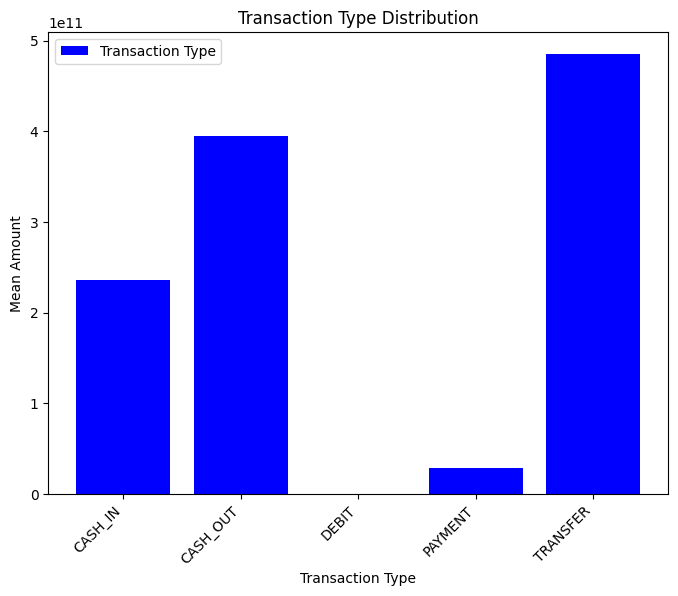

In [ ]:
# Visualize the type of transactions grouped by amount
grouped_df = fraud_df.groupby('type')['amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(grouped_df['type'], grouped_df['amount'], color='blue', label='Transaction Type')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Mean Amount')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

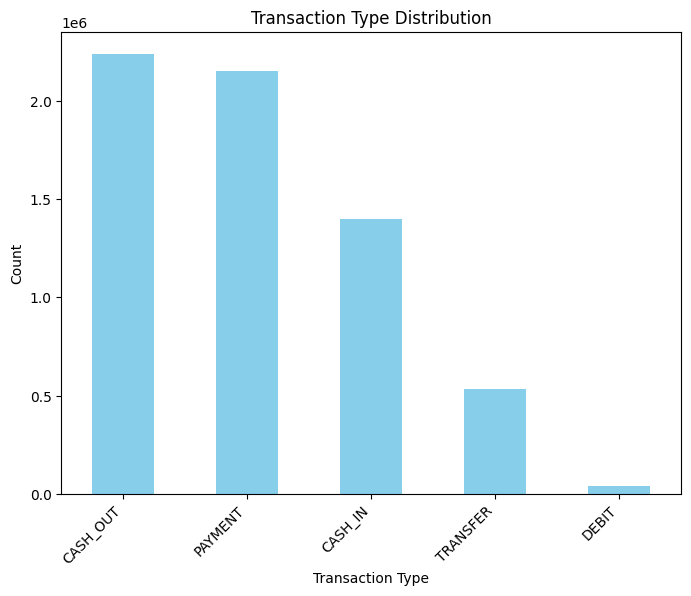

In [ ]:

transaction_type_counts = fraud_df['type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind='bar', color='skyblue')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

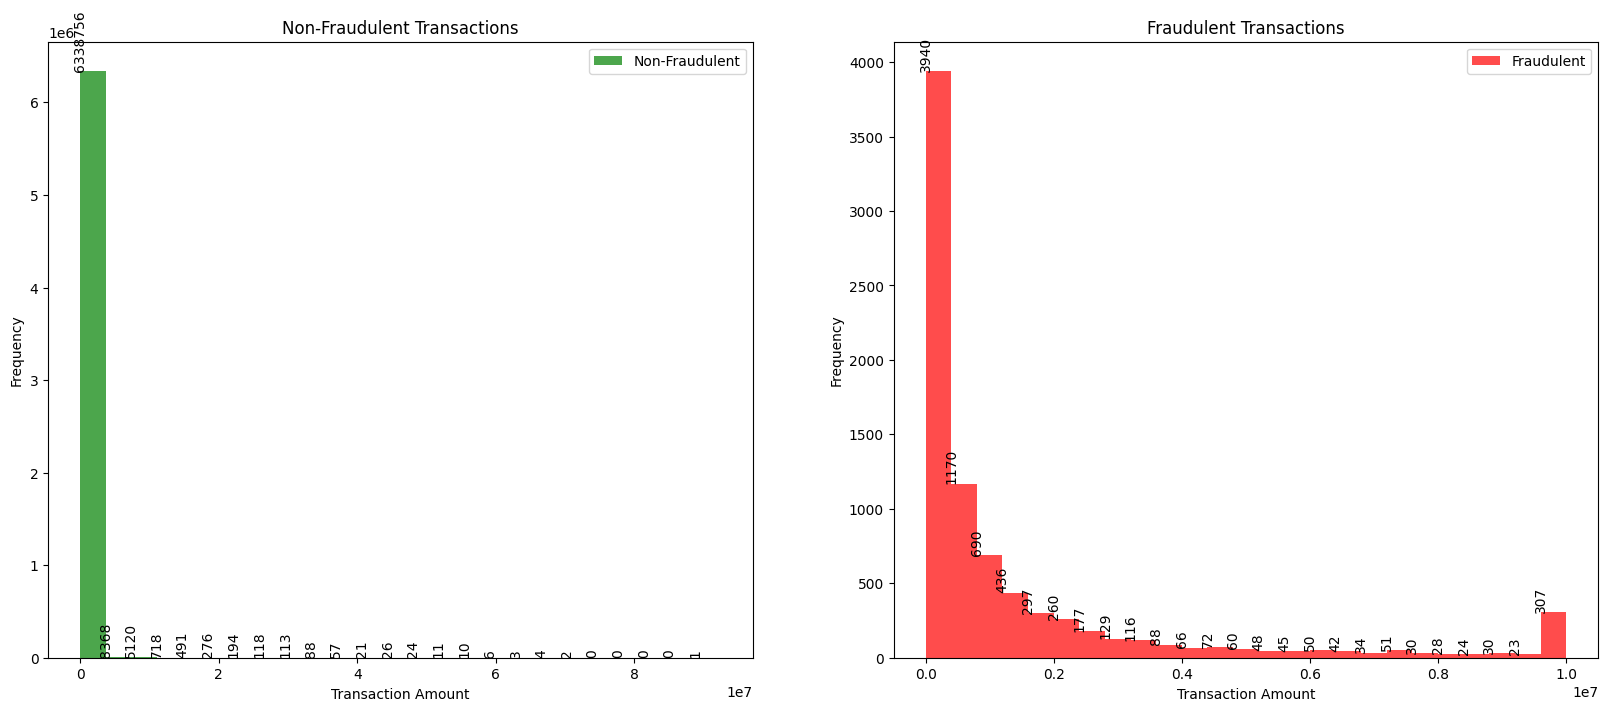

In [ ]:

fraudulent_transactions = fraud_df[fraud_df['isFraud'] == 1]['amount']
non_fraudulent_transactions = fraud_df[fraud_df['isFraud'] == 0]['amount']

# Create two subplots
plt.figure(figsize=(20, 8))

# Plotting histogram for non-fraudulent transactions
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(non_fraudulent_transactions, bins=25, alpha=0.7, color='green', label='Non-Fraudulent')
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

# Annotating each bar with its count for non-fraudulent transactions (vertical text)
for count, bin_value, patch in zip(n, bins, patches):
    plt.text(bin_value + 0.5, count, str(int(count)), ha='center', va='bottom', rotation='vertical')

# Plotting histogram for fraudulent transactions
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(fraudulent_transactions, bins=25, alpha=0.7, color='red', label='Fraudulent')
plt.title('Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

# Annotating each bar with its count for fraudulent transactions (vertical text)
for count, bin_value, patch in zip(n, bins, patches):
    plt.text(bin_value + 0.5, count, str(int(count)), ha='center', va='bottom', rotation='vertical')

plt.show()

In [ ]:

fraudulent_transactions.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:

non_fraudulent_transactions.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

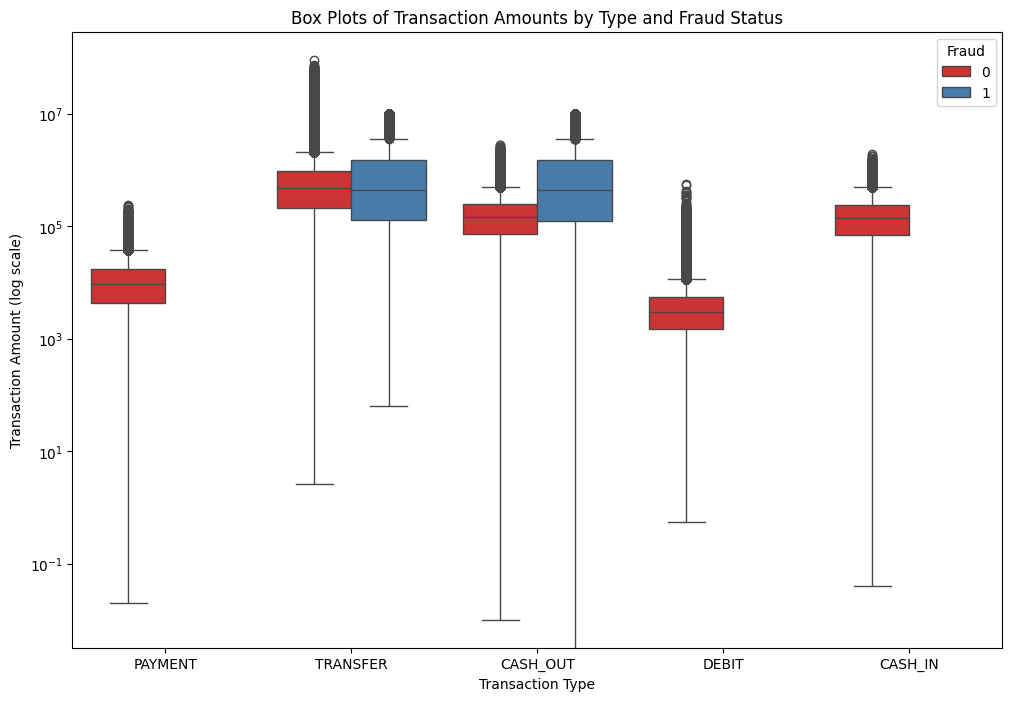

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', data=fraud_df, hue='isFraud', palette='Set1')
plt.yscale('log')  # Use a logarithmic scale for better visualization if the amounts vary widely
plt.title('Box Plots of Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount (log scale)')
plt.legend(title='Fraud', loc='upper right')
plt.show()

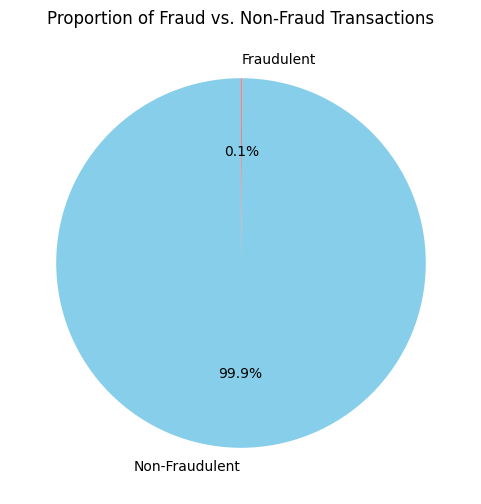

In [ ]:

fraud_counts = fraud_df['isFraud'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Proportion of Fraud vs. Non-Fraud Transactions')
plt.show()

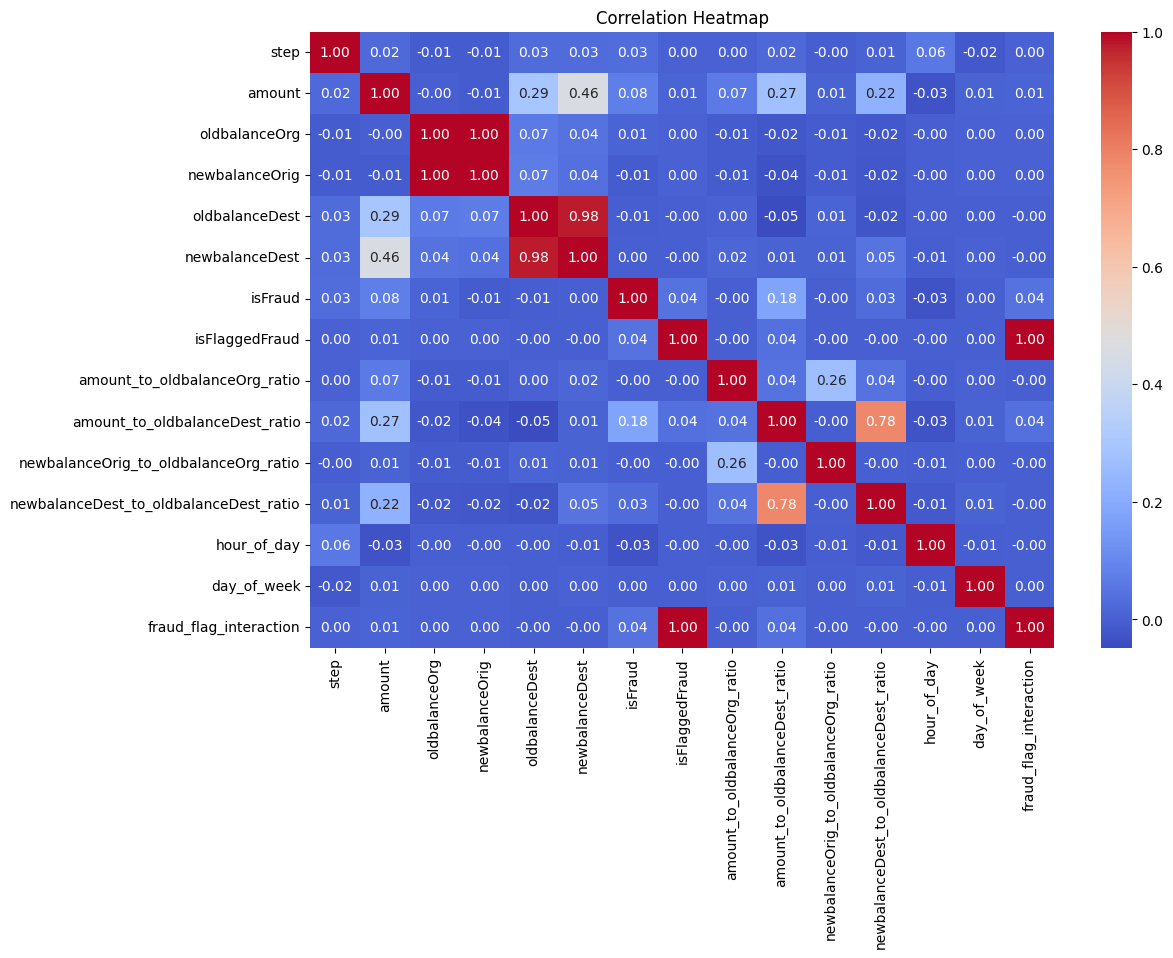

In [ ]:
# Heatmap of transactions
numerical_features = fraud_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = fraud_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


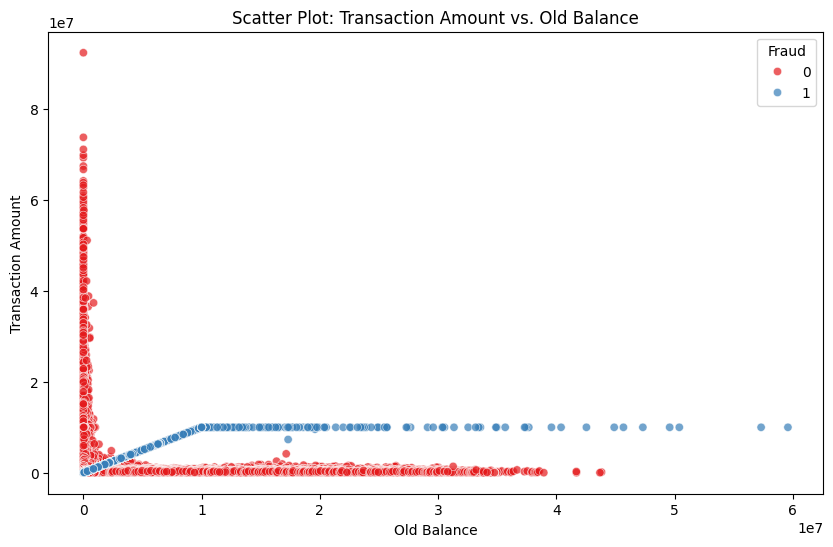

In [ ]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=fraud_df, hue='isFraud', palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Transaction Amount vs. Old Balance')
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud', loc='upper right')
plt.show()

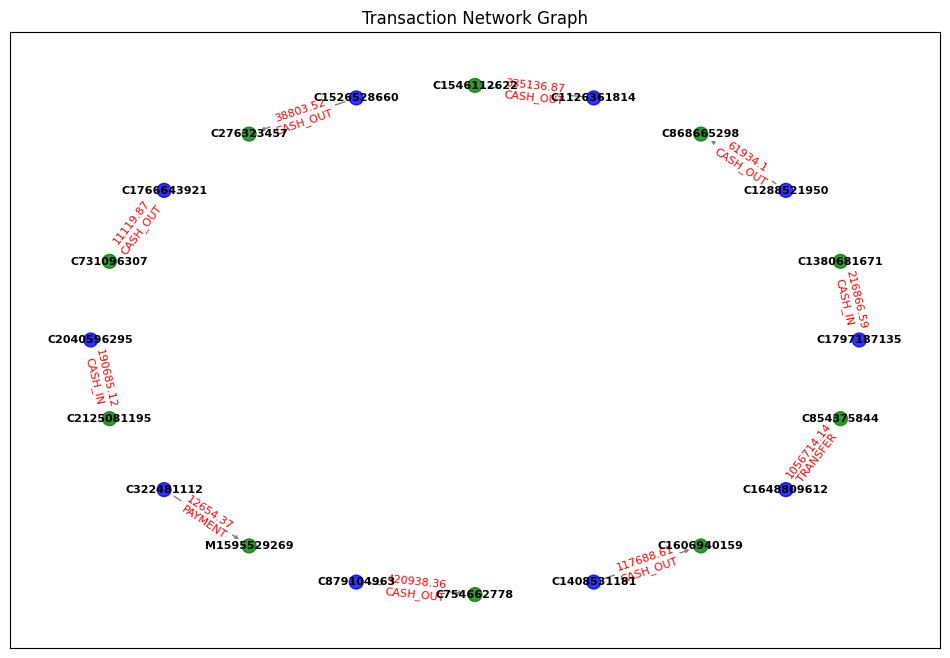

In [ ]:
# Sample a subset of the data for visualization
subset_df = fraud_df.sample(n=10)  # Adjust the number as needed

# Create a directed graph
G = nx.DiGraph()

# Add nodes and their attributes
for _, row in subset_df.iterrows():
    for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
        G.add_node(row['nameOrig'], attr=row[col], color='blue', node_type='nameOrig', label=row['nameOrig'])
        G.add_node(row['nameDest'], attr=row[col], color='green', node_type='nameDest', label=row['nameDest'])
    G.add_edge(row['nameOrig'], row['nameDest'], amount=row['amount'], type=row['type'])

# Draw the graph with circular layout
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)

# Extract node colors and types for drawing
node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_types = [G.nodes[node]['node_type'] for node in G.nodes]

# Draw nodes with different colors based on types
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100, alpha=0.8)

# Draw edges with labels for amount and type
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=5)
edge_labels = {(edge[0], edge[1]): f"{G.edges[edge]['amount']}\n{G.edges[edge]['type']}" for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Draw labels for nodes
labels = {node: G.nodes[node]['label'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black', font_weight='bold')

plt.title('Transaction Network Graph')
plt.show()

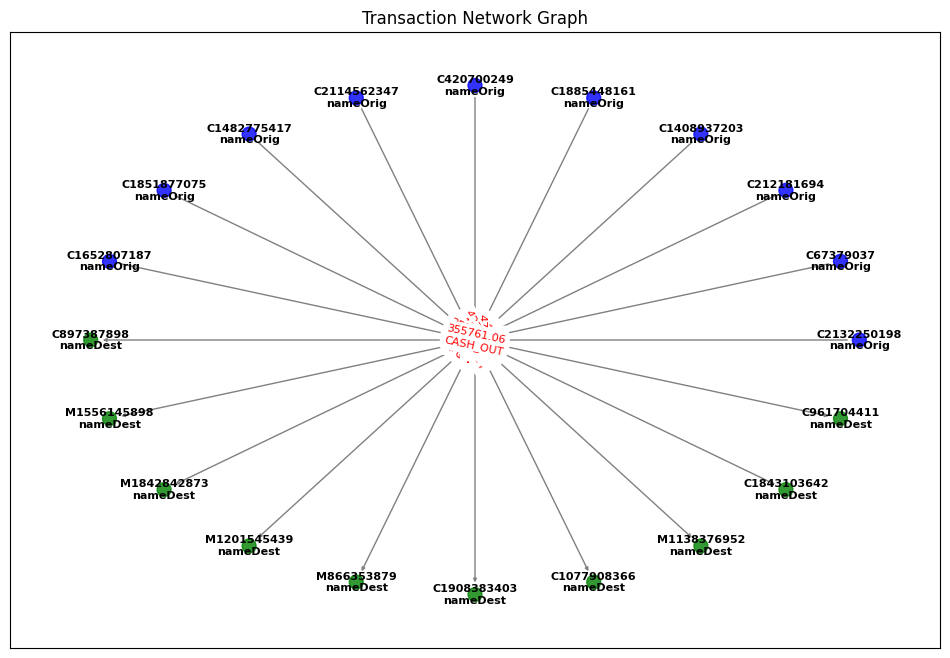

In [ ]:

# Sample a subset of the data for visualization
subset_df = fraud_df.sample(n=10)  # Adjust the number as needed

# Create a directed graph
G = nx.DiGraph()

# Add nodes (users/accounts)
G.add_nodes_from(subset_df['nameOrig'], color='blue', node_type='nameOrig')
G.add_nodes_from(subset_df['nameDest'], color='green', node_type='nameDest')

# Add edges (transactions)
for _, row in subset_df.iterrows():
    G.add_edge(row['nameOrig'], row['nameDest'], amount=row['amount'], type=row['type'])

# Draw the graph with circular layout
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)

# Extract node colors and types for drawing
node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_types = [G.nodes[node]['node_type'] for node in G.nodes]

# Draw nodes with different colors based on types
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=100, alpha=0.8)

# Draw edges with labels for amount and type
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=5)
edge_labels = {(edge[0], edge[1]): f"{G.edges[edge]['amount']}\n{G.edges[edge]['type']}" for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Draw labels for nodes
labels = {node: f"{node}\n{node_type}" for node, node_type in zip(G.nodes, node_types)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='black', font_weight='bold')

plt.title('Transaction Network Graph')
plt.show()

In [ ]:

fraud_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_to_oldbalanceOrg_ratio',
       'amount_to_oldbalanceDest_ratio',
       'newbalanceOrig_to_oldbalanceOrg_ratio',
       'newbalanceDest_to_oldbalanceDest_ratio', 'hour_of_day', 'day_of_week',
       'transaction_direction', 'fraud_flag_interaction', 'amount_bin'],
      dtype='object')

In [ ]:

fraud_df.shape

(6362620, 20)

## Data Preprocessing & Model Training

In [ ]:

# Encode categorical features using LabelEncoder

le = LabelEncoder() # Instantiate label encoder
fraud_df['nameOrig'] = le.fit_transform(fraud_df['nameOrig'])
fraud_df['nameDest'] = le.fit_transform(fraud_df['nameDest'])
fraud_df['transaction_direction'] = le.fit_transform(fraud_df['transaction_direction'])
fraud_df['amount_bin'] = le.fit_transform(fraud_df['amount_bin'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(fraud_df, test_size=0.2, random_state=42)


# Define a function to create mini-batches
def create_mini_batches(fraud_df, batch_size):
    num_batches = len(fraud_df) // batch_size
    for i in range(num_batches):
        batch_data = fraud_df.iloc[i * batch_size: (i + 1) * batch_size]
        yield batch_data


# Define the neural network model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=3),  # Update input_dim accordingly
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training loop with mini-batch processing
batch_size = 512
num_epochs = 10

for epoch in range(num_epochs):
    for batch_data in create_mini_batches(train_df, batch_size):
        x_batch = batch_data[['amount', 'transaction_direction', 'amount_bin']].values
        y_batch = batch_data['isFraud'].values
        model.train_on_batch(x_batch, y_batch)

# Evaluate the model on the test set
x_test = test_df[['amount', 'transaction_direction', 'amount_bin']].values
y_test = test_df['isFraud'].values
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39767/39767 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9987 - loss: 0.0099
Test Loss: 0.009746533818542957, Test Accuracy: 0.9987285137176514


In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

print('\nConfusion Matrix:')
print(conf_matrix)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 30s 758us/step
Accuracy: 0.9987
Precision: 1.0000
Recall: 0.0012
F1 Score: 0.0025
ROC AUC: 0.5015

Confusion Matrix:
[[1270904       0]
 [   1618       2]]


In [ ]:

# Data Preprocessing

# Compute new balance after transactions
fraud_df['newbalanceOrig_expected'] = fraud_df['oldbalanceOrg'] - fraud_df['amount']
fraud_df['newbalanceDest_expected'] = fraud_df['oldbalanceDest'] + fraud_df['amount']

# Check if actual new balances match expected new balances
fraud_df['is_fraud'] = ((fraud_df['newbalanceOrig'] != fraud_df['newbalanceOrig_expected']) | (fraud_df['newbalanceDest'] != fraud_df['newbalanceDest_expected'])).astype(int)

# Extract relevant features
node_features = torch.tensor(fraud_df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)

# Create a unique identifier for nodes if not available
fraud_df['node_identifier'] = range(len(fraud_df))

# Map categorical identifiers to numerical indices
id_mapping = {id_: idx for idx, id_ in enumerate(fraud_df['node_identifier'].unique())}
fraud_df['nameOrig'] = fraud_df['node_identifier'].map(id_mapping)
fraud_df['nameDest'] = fraud_df['node_identifier'].map(id_mapping)

# Create a PyTorch Geometric Data object with edge_index
edges = torch.tensor(fraud_df[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
data = Data(x=node_features, edge_index=edges)

# Define the GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
gnn_model = GNNModel(input_dim=node_features.size(1), hidden_dim=64, output_dim=32)

# Define optimizer and loss function
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    out = gnn_model(data)
    # Assuming you have a target label for each node (e.g., binary classification)
    target = torch.tensor(fraud_df['is_fraud'].values, dtype=torch.long)  # Adjust based on your actual target labels
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

# Extract node embeddings after training
with torch.no_grad():
    gnn_model.eval()
    node_embeddings = gnn_model.conv1(data.x, data.edge_index).detach().numpy()

# Implement Anomaly Detection with Isolation Forest
iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

# Predict anomalies
anomaly_scores = iso_forest.decision_function(node_embeddings)
fraud_df['anomaly_score'] = anomaly_scores

# Flag Potentially Fraudulent Transactions or Users based on a threshold
threshold = -0.2  # Adjust this threshold based on your evaluation
fraud_df['is_potentially_fraudulent'] = (fraud_df['anomaly_score'] < threshold).astype(int)

# Print the flagged potentially fraudulent transactions or users
print(fraud_df[fraud_df['is_potentially_fraudulent'] == 1])


         step      type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
359         1  TRANSFER   2421578.09       359           0.00            0.00   
362         1  TRANSFER   1457213.54       362           0.00            0.00   
375         1  TRANSFER   2545478.01       375           0.00            0.00   
376         1  TRANSFER   2061082.82       376           0.00            0.00   
432         1   CASH_IN    349505.89       432     7330235.59      7679741.48   
...       ...       ...          ...       ...            ...             ...   
6362460   730  TRANSFER  10000000.00   6362460    17316255.05     17316255.05   
6362462   730  TRANSFER   7316255.05   6362462    17316255.05     17316255.05   
6362576   741  TRANSFER  10000000.00   6362576    45674547.89     35674547.89   
6362578   741  TRANSFER  10000000.00   6362578    35674547.89     25674547.89   
6362580   741  TRANSFER  10000000.00   6362580    25674547.89     15674547.89   

         nameDest  oldbalan

In [ ]:

ground_truth_labels = fraud_df['is_fraud'].values  # Actual labels from your dataset
predicted_labels = fraud_df['is_potentially_fraudulent'].values  # Predicted labels from your model

# Calculate evaluation metrics
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision = precision_score(ground_truth_labels, predicted_labels)
recall = recall_score(ground_truth_labels, predicted_labels)
f1 = f1_score(ground_truth_labels, predicted_labels)
roc_auc = roc_auc_score(ground_truth_labels, predicted_labels)
conf_matrix = confusion_matrix(ground_truth_labels, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.04021440852981948
Precision: 0.9950133175495709
Recall: 0.021550299227810054
F1 Score: 0.04218690178353106
ROC AUC Score: 0.5080141445097324
Confusion Matrix:
[[ 121383     674]
 [6106077  134486]]


In [ ]:

# Take 10% of the data
df_sampled, _ = train_test_split(fraud_df, test_size=0.9, random_state=42)

# Oversample instances where isFraud is 1
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df_sampled[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']],
                                                    df_sampled['isFraud'])

df_resampled = pd.DataFrame(X_resampled, columns=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
df_resampled['isFraud'] = y_resampled

# Create a unique identifier for nodes if not available
df_resampled['node_identifier'] = range(len(df_resampled))

# Map categorical identifiers to numerical indices
id_mapping = {id_: idx for idx, id_ in enumerate(df_resampled['node_identifier'].unique())}
df_resampled['nameOrig'] = df_resampled['node_identifier'].map(id_mapping)
df_resampled['nameDest'] = df_resampled['node_identifier'].map(id_mapping)

# Create a PyTorch Geometric Data object with edge_index
edges = torch.tensor(df_resampled[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
node_features = torch.tensor(df_resampled[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)
data = Data(x=node_features, edge_index=edges)
# Define the GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
gnn_model = GNNModel(input_dim=node_features.size(1), hidden_dim=64, output_dim=32)

# Define optimizer and loss function
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop with progress bar
num_epochs = 100
for epoch in tqdm(range(num_epochs), desc='Training GNN'):
    optimizer.zero_grad()
    out = gnn_model(data)
    # Assuming you have a target label for each node (e.g., binary classification)
    target = torch.tensor(df_resampled['isFraud'].values, dtype=torch.long)  # Adjust based on your actual target labels
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

# Extract node embeddings after training
with torch.no_grad():
    gnn_model.eval()
    node_embeddings = gnn_model.conv1(data.x, data.edge_index).detach().numpy()

# Implement Anomaly Detection with Isolation Forest
iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

# Predict anomalies
anomaly_scores = iso_forest.decision_function(node_embeddings)
df_resampled['anomaly_score'] = anomaly_scores

# Flag Potentially Fraudulent Transactions or Users based on a threshold
threshold = -0.2  # Adjust this threshold based on your evaluation
df_resampled['is_potentially_fraudulent'] = (df_resampled['anomaly_score'] < threshold).astype(int)

# Print the flagged potentially fraudulent transactions or users
print(df_resampled[df_resampled['is_potentially_fraudulent'] == 1])


Training GNN: 100%|██████████| 100/100 [16:47<00:00, 10.08s/it]


              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
17         265813.85    18915905.52     19181719.37       325653.23   
22         156311.85    21111723.56     21268035.41       171776.99   
78         175455.06    16517267.14     16692722.20      3904764.24   
93         275148.79    22642759.24     22917908.03      1269160.41   
149        116162.85         150.00            0.00     25081306.44   
...              ...            ...             ...             ...   
1270268   7788725.20     7788725.20            0.00     26829584.15   
1270274  10000000.00    35674547.89     25674547.89            0.00   
1270290   7788725.20     7788725.20            0.00     26829584.15   
1270642  10000000.00    34892193.09     24892193.09            0.00   
1270838  10000000.00    23441041.46     13441041.46            0.00   

         newbalanceDest  isFraud  node_identifier  nameOrig  nameDest  \
17             59839.38        0               17        17        17   
2

In [ ]:

# Convert the anomaly scores to binary predictions
predicted_labels = (df_resampled['anomaly_score'] < threshold).astype(int)

# True labels
true_labels = df_resampled['isFraud']

# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, df_resampled['anomaly_score'])
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5001
Precision: 0.5022
Recall: 0.0149
F1 Score: 0.0289
AUC-ROC: 0.4364
Confusion Matrix:
[[626070   9381]
 [625987   9464]]


In [ ]:

# Extract relevant features and drop non-numeric columns
node_features = torch.tensor(fraud_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)

# Create a unique identifier for nodes if not available
fraud_df['node_identifier'] = range(len(fraud_df))

# Map categorical identifiers to numerical indices
id_mapping = {id_: idx for idx, id_ in enumerate(fraud_df['node_identifier'].unique())}
fraud_df['nameOrig'] = fraud_df['node_identifier'].map(id_mapping)
fraud_df['nameDest'] = fraud_df['node_identifier'].map(id_mapping)

# Create a PyTorch Geometric Data object with edge_index
edges = torch.tensor(fraud_df[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
data = Data(x=node_features, edge_index=edges)

# Define the GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the GNN model
gnn_model = GNNModel(input_dim=node_features.size(1), hidden_dim=64, output_dim=32)

# Define optimizer and loss function
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    out = gnn_model(data)
    # Assuming you have a target label for each node (e.g., binary classification)
    target = torch.tensor(fraud_df['isFraud'].values, dtype=torch.long)  # Adjust based on your actual target labels
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()

# Extract node embeddings after training
with torch.no_grad():
    gnn_model.eval()
    node_embeddings = gnn_model.conv1(data.x, data.edge_index).detach().numpy()

# Implement Anomaly Detection with Isolation Forest
iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

# Predict anomalies
anomaly_scores = iso_forest.decision_function(node_embeddings)
fraud_df['anomaly_score'] = anomaly_scores

# Flag Potentially Fraudulent Transactions or Users based on a threshold
threshold = -0.2  # Adjust this threshold based on your evaluation
fraud_df['is_potentially_fraudulent'] = (fraud_df['anomaly_score'] < threshold).astype(int)

# Print the flagged potentially fraudulent transactions or users
print(fraud_df[fraud_df['is_potentially_fraudulent'] == 1])

         step      type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
359         1  TRANSFER   2421578.09       359           0.00            0.00   
362         1  TRANSFER   1457213.54       362           0.00            0.00   
375         1  TRANSFER   2545478.01       375           0.00            0.00   
376         1  TRANSFER   2061082.82       376           0.00            0.00   
432         1   CASH_IN    349505.89       432     7330235.59      7679741.48   
...       ...       ...          ...       ...            ...             ...   
6362507   734  CASH_OUT  10000000.00   6362507    10000000.00            0.00   
6362576   741  TRANSFER  10000000.00   6362576    45674547.89     35674547.89   
6362578   741  TRANSFER  10000000.00   6362578    35674547.89     25674547.89   
6362580   741  TRANSFER  10000000.00   6362580    25674547.89     15674547.89   
6362582   741  TRANSFER  10000000.00   6362582    15674547.89      5674547.89   

         nameDest  oldbalan

In [ ]:
# Save the trained model to a file
torch.save(gnn_model.state_dict(), "/content/drive/MyDrive/data/models/fraud_gnn_model.pth")

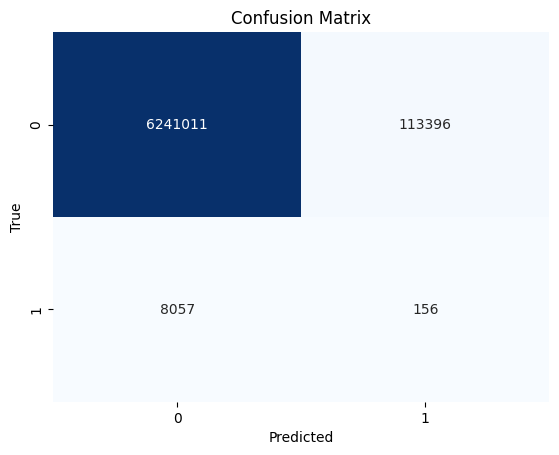

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   6354407
           1       0.00      0.02      0.00      8213

    accuracy                           0.98   6362620
   macro avg       0.50      0.50      0.50   6362620
weighted avg       1.00      0.98      0.99   6362620



In [ ]:

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
cm = confusion_matrix(fraud_df['isFraud'].values, fraud_df['is_potentially_fraudulent'].values)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(fraud_df['isFraud'].values, fraud_df['is_potentially_fraudulent'].values))

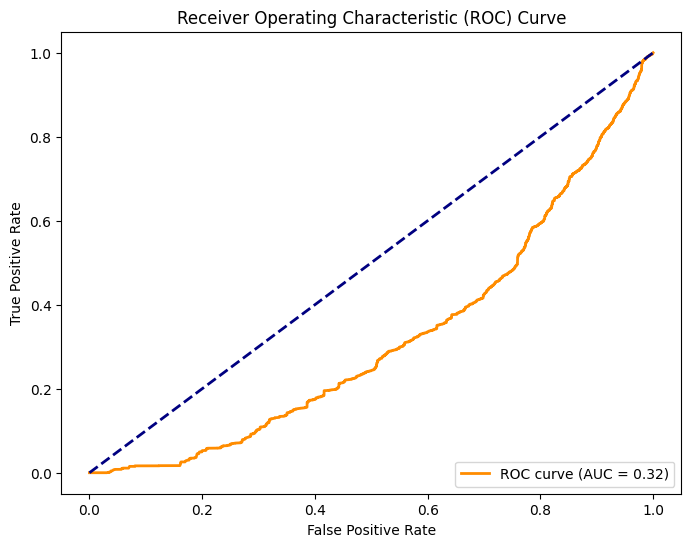

In [ ]:

fpr, tpr, _ = roc_curve(fraud_df['isFraud'].values, fraud_df['anomaly_score'].values)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

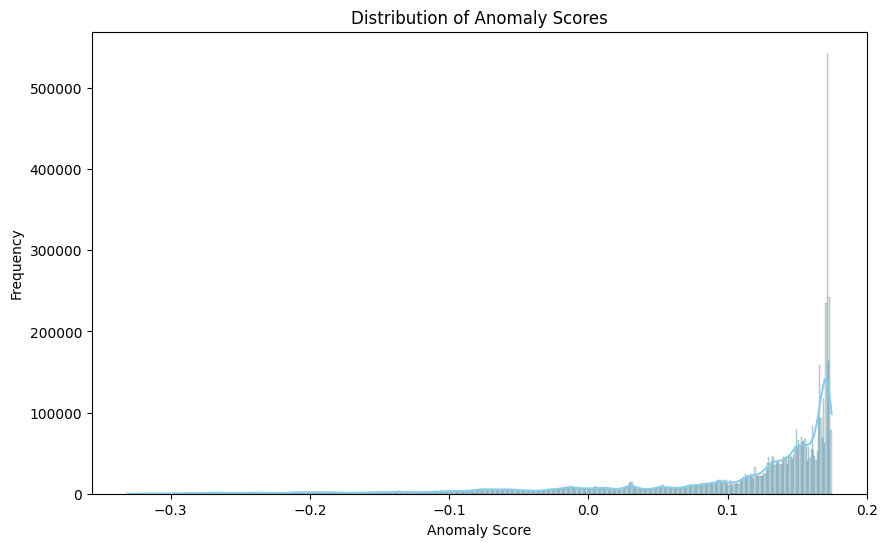

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['anomaly_score'], kde=True, color='skyblue')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
y_true = fraud_df['isFraud'].values
y_pred = fraud_df['is_potentially_fraudulent'].values

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, fraud_df['anomaly_score'].values)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC Score: {roc_auc:.4f}')

Precision: 0.0014
Recall: 0.0190
F1 Score: 0.0026
AUC-ROC Score: 0.3206


In [ ]:

fraud_df

step      type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64         0      170136.00       160296.36   
1           1   PAYMENT     1864.28         1       21249.00        19384.72   
2           1  TRANSFER      181.00         2         181.00            0.00   
3           1  CASH_OUT      181.00         3         181.00            0.00   
4           1   PAYMENT    11668.14         4       41554.00        29885.86   
...       ...       ...         ...       ...            ...             ...   
6362615   743  CASH_OUT   339682.13   6362615      339682.13            0.00   
6362616   743  TRANSFER  6311409.28   6362616     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28   6362617     6311409.28            0.00   
6362618   743  TRANSFER   850002.52   6362618      850002.52            0.00   
6362619   743  CASH_OUT   850002.52   6362619      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  day_of_week  \
0               0            0.00            0.00        0  ...            1   
1               1            0.00            0.00        0  ...            1   
2               2            0.00            0.00        1  ...            1   
3               3        21182.00            0.00        1  ...            1   
4               4            0.00            0.00        0  ...            1   
...           ...             ...             ...      ...  ...          ...   
6362615   6362615            0.00       339682.13        1  ...            1   
6362616   6362616            0.00            0.00        1  ...            1   
6362617   6362617        68488.84      6379898.11        1  ...            1   
6362618   6362618            0.00            0.00        1  ...            1   
6362619   6362619      6510099.11      7360101.63        1  ...            1   

         transaction_direction  fraud_flag_interaction  amount_bin  \
0                            1                       0           2   
1                            1                       0           1   
2                            1                       0           4   
3                            1                       0           4   
4                            1                       0           0   
...                        ...                     ...         ...   
6362615                      1                       0           3   
6362616                      1                       0           3   
6362617                      1                       0           3   
6362618                      1                       0           3   
6362619                      1                       0           3   

         newbalanceOrig_expected  newbalanceDest_expected  is_fraud  \
0                      160296.36                  9839.64         1   
1                       19384.72                  1864.28         1   
2                           0.00                   181.00         1   
3                           0.00                 21363.00         1   
4                       29885.86                 11668.14         1   
...                          ...                      ...       ...   
6362615                     0.00                339682.13         0   
6362616                     0.00               6311409.28         1   
6362617                     0.00               6379898.12         1   
6362618                     0.00                850002.52         1   
6362619                     0.00               7360101.63         1   

         node_identifier  anomaly_score  is_potentially_fraudulent  
0                      0       0.149661                          0  
1                      1       0.172691                          0  
2                      2       0.165811                          0  
3                      3       0.170117                          0  
4                      4       0.172811         

In [ ]:

# Assuming 'fraud_cases' is a DataFrame containing detected fraud cases
fraud_cases = fraud_df[fraud_df['is_potentially_fraudulent'] == 1]

# Create an interactive scatter plot
fig = px.scatter(fraud_cases, x='amount', y='anomaly_score', color='is_potentially_fraudulent', hover_data=['step', 'type'])
fig.update_layout(title='Detected Fraud Cases', xaxis_title='Amount', yaxis_title='Anomaly Score')
fig.show()

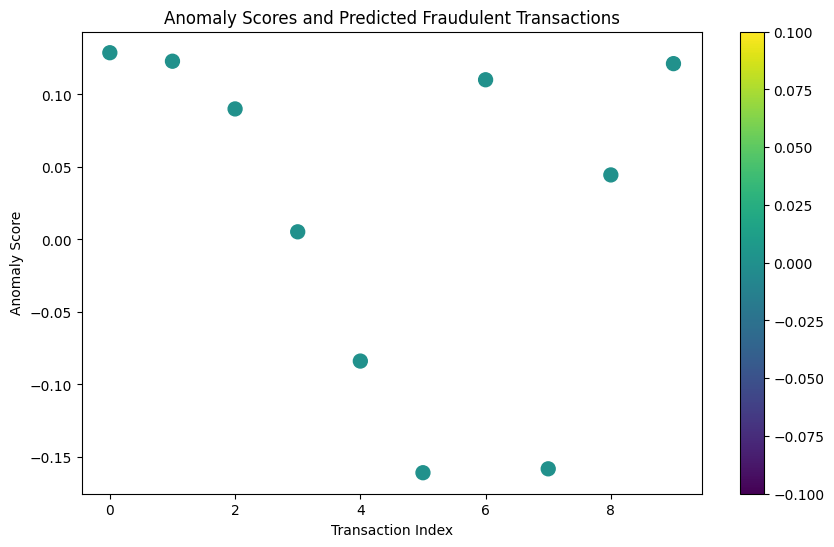

In [ ]:

# Instantiate the GNN model
gnn_model = GNNModel(input_dim=5, hidden_dim=64, output_dim=32)  # Adjust input_dim based on your feature columns
gnn_model.load_state_dict(torch.load("/content/drive/MyDrive/data/models/fraud_gnn_model.pth"))  # Replace with the actual path to your saved model

# Extract relevant features for the selected transactions
selected_indices = random.sample(range(len(fraud_df)), 10)
selected_data = fraud_df.iloc[selected_indices][['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Map categorical identifiers to numerical indices
id_mapping = {id_: idx for idx, id_ in enumerate(selected_data.index)}
selected_data['nameOrig'] = selected_data.index.map(id_mapping)
selected_data['nameDest'] = selected_data.index.map(id_mapping)

# Create a PyTorch Geometric Data object with edge_index
node_features = torch.tensor(selected_data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float32)
edges = torch.tensor(selected_data[['nameOrig', 'nameDest']].values, dtype=torch.long).t().contiguous()
selected_data = Data(x=node_features, edge_index=edges)

# Set the model to evaluation mode
gnn_model.eval()

# Forward pass through the GNN
with torch.no_grad():
    node_embeddings = gnn_model.conv1(selected_data.x, selected_data.edge_index).numpy()

# Implement Anomaly Detection with Isolation Forest
iso_forest = IsolationForest()
iso_forest.fit(node_embeddings)

# Predict anomalies
anomaly_scores = iso_forest.decision_function(node_embeddings)
selected_data['anomaly_score'] = anomaly_scores

# Flag Potentially Fraudulent Transactions based on a threshold
threshold = -0.2  # Adjust this threshold based on your evaluation
selected_data['is_potentially_fraudulent'] = (selected_data['anomaly_score'] < threshold).astype(int)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(10), selected_data['anomaly_score'], c=selected_data['is_potentially_fraudulent'], cmap='viridis', s=100)
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores and Predicted Fraudulent Transactions')
plt.colorbar()
plt.show()

step                                      0
type                                      0
amount                                    0
nameOrig                                  0
oldbalanceOrg                             0
newbalanceOrig                            0
nameDest                                  0
oldbalanceDest                            0
newbalanceDest                            0
isFraud                                   0
isFlaggedFraud                            0
amount_to_oldbalanceOrg_ratio             0
amount_to_oldbalanceDest_ratio            0
newbalanceOrig_to_oldbalanceOrg_ratio     0
newbalanceDest_to_oldbalanceDest_ratio    0
hour_of_day                               0
day_of_week                               0
transaction_direction                     0
fraud_flag_interaction                    0
amount_bin                                0
newbalanceOrig_expected                   0
newbalanceDest_expected                   0
is_fraud                        

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning:

invalid value encountered in subtract



               step        amount      nameOrig  oldbalanceOrg  \
count  6.362620e+06  6.362620e+06  6.362620e+06   6.362620e+06   
mean   2.433972e+02  1.798619e+05  3.181310e+06   8.338831e+05   
std    1.423320e+02  6.038582e+05  1.836730e+06   2.888243e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.560000e+02  1.338957e+04  1.590655e+06   0.000000e+00   
50%    2.390000e+02  7.487194e+04  3.181310e+06   1.420800e+04   
75%    3.350000e+02  2.087215e+05  4.771964e+06   1.073152e+05   
max    7.430000e+02  9.244552e+07  6.362619e+06   5.958504e+07   

       newbalanceOrig      nameDest  oldbalanceDest  newbalanceDest  \
count    6.362620e+06  6.362620e+06    6.362620e+06    6.362620e+06   
mean     8.551137e+05  3.181310e+06    1.100702e+06    1.224996e+06   
std      2.924049e+06  1.836730e+06    3.399180e+06    3.674129e+06   
min      0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
25%      0.000000e+00  1.590655e+06    0.000000e+0

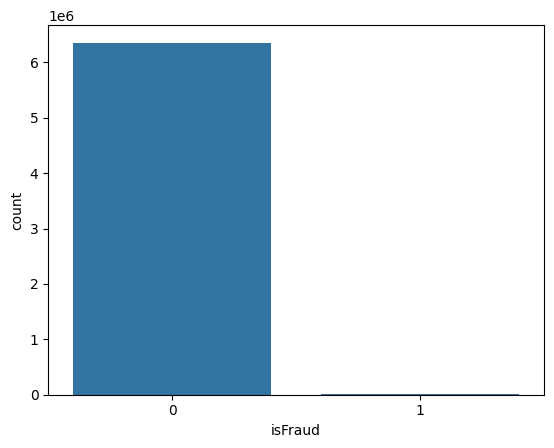

In [ ]:
# Check for missing values
print(fraud_df.isnull().sum())

# Examine data distribution
print(fraud_df['isFraud'].value_counts())

# Explore features
print(fraud_df.describe())

# Visualize data distribution
import seaborn as sns
sns.countplot(x='isFraud', data=fraud_df)
plt.show()

In [ ]:
# Assuming you already have the anomaly scores in 'anomaly_scores' column
anomaly_scores = fraud_df['anomaly_score'].values

# Define the range of threshold values to explore
threshold_range = np.arange(-0.5, 0.5, 0.05)

best_threshold = None
best_f1_score = 0.0  # Initialize with a suitable starting value

for threshold in threshold_range:
    # Apply threshold and obtain binary predictions
    predictions = (anomaly_scores < threshold).astype(int)

    # Evaluate the model using the F1 score
    current_f1_score = f1_score(fraud_df['isFraud'].values, predictions)

    # Update best threshold if the current F1 score is better
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1_score}')

Best Threshold: -0.10000000000000009
Best F1 Score: 0.005992245329573493


In [ ]:
# Assuming you already have the anomaly scores in 'anomaly_scores' column
anomaly_scores = fraud_df['anomaly_score'].values

# Use the optimized threshold to classify transactions as potentially fraudulent
optimized_threshold = -0.15000000000000008
fraud_df['is_potentially_fraudulent'] = (anomaly_scores < optimized_threshold).astype(int)

# Evaluate performance
y_true = fraud_df['isFraud'].values
y_pred = fraud_df['is_potentially_fraudulent'].values

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Optimized Threshold: {optimized_threshold}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:')
print(cm)

# Classification Report
classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:')
print(classification_rep)

# ROC-AUC Score
roc_auc = roc_auc_score(y_true, anomaly_scores)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

Optimized Threshold: -0.15000000000000008
Precision: 0.0029
Recall: 0.0699
F1 Score: 0.0056

Confusion Matrix:
[[6159082  195325]
 [   7639     574]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   6354407
           1       0.00      0.07      0.01      8213

    accuracy                           0.97   6362620
   macro avg       0.50      0.52      0.49   6362620
weighted avg       1.00      0.97      0.98   6362620


ROC-AUC Score: 0.3206


In [ ]:
# Make a copy of the DataFrame for feature engineering
df_fe = fraud_df.copy()

# Time-Based Features
df_fe['hour_of_day'] = df_fe['step'] % 24  # Assuming 'step' represents the hour of the day
df_fe['day_of_week'] = df_fe['step'] % 7   # Assuming 'step' represents days of the week
df_fe['days_since_last_transaction'] = (df_fe['step'] - df_fe.groupby('nameOrig')['step'].shift()).fillna(0)

# Frequency-Based Features
df_fe['transaction_count_user'] = df_fe.groupby('nameOrig')['step'].transform('count')
df_fe['transaction_rate_user'] = df_fe['transaction_count_user'] / (df_fe['days_since_last_transaction'] + 1)

# Aggregate Statistics
df_fe['total_transaction_amount_user'] = df_fe.groupby('nameOrig')['amount'].transform('sum')
df_fe['average_transaction_amount_user'] = df_fe.groupby('nameOrig')['amount'].transform('mean')
df_fe['std_transaction_amount_user'] = df_fe.groupby('nameOrig')['amount'].transform('std')

# Interaction Features
df_fe['amount_ratio'] = df_fe['newbalanceOrig'] / (df_fe['oldbalanceOrg'] + 1e-6)

# Transaction Amount Binning
bins = [-float('inf'), 100, 500, 1000, float('inf')]
labels = ['very_low', 'low', 'medium', 'high']
df_fe['amount_bin'] = pd.cut(df_fe['amount'], bins=bins, labels=labels)

# Print the DataFrame with new features
print(df_fe.head())

   step      type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64         0       170136.0       160296.36   
1     1   PAYMENT   1864.28         1        21249.0        19384.72   
2     1  TRANSFER    181.00         2          181.0            0.00   
3     1  CASH_OUT    181.00         3          181.0            0.00   
4     1   PAYMENT  11668.14         4        41554.0        29885.86   

   nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  node_identifier  \
0         0             0.0             0.0        0  ...                0   
1         1             0.0             0.0        0  ...                1   
2         2             0.0             0.0        1  ...                2   
3         3         21182.0             0.0        1  ...                3   
4         4             0.0             0.0        0  ...                4   

   anomaly_score  is_potentially_fraudulent  days_since_last_transaction  \
0       0.149661      